In [8]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [9]:
! mkdir ~/.kaggle/
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [10]:
! kaggle datasets download -d vaibhao/handwritten-characters

100% 1.61G/1.62G [00:39<00:00, 66.8MB/s]
100% 1.62G/1.62G [00:39<00:00, 44.5MB/s]


In [11]:
! kaggle datasets download -d landlord/handwriting-recognition

100% 1.25G/1.26G [00:32<00:00, 70.4MB/s]
100% 1.26G/1.26G [00:32<00:00, 42.1MB/s]


In [12]:
! unzip "/content/handwriting-recognition.zip"

Streaming output truncated to the last 5000 lines.
  inflating: validation_v2/validation/VALIDATION_5003.jpg  
  inflating: validation_v2/validation/VALIDATION_5004.jpg  
  inflating: validation_v2/validation/VALIDATION_5005.jpg  
  inflating: validation_v2/validation/VALIDATION_5006.jpg  
  inflating: validation_v2/validation/VALIDATION_5007.jpg  
  inflating: validation_v2/validation/VALIDATION_5008.jpg  
  inflating: validation_v2/validation/VALIDATION_5009.jpg  
  inflating: validation_v2/validation/VALIDATION_5010.jpg  
  inflating: validation_v2/validation/VALIDATION_5011.jpg  
  inflating: validation_v2/validation/VALIDATION_5012.jpg  
  inflating: validation_v2/validation/VALIDATION_5013.jpg  
  inflating: validation_v2/validation/VALIDATION_5014.jpg  
  inflating: validation_v2/validation/VALIDATION_5015.jpg  
  inflating: validation_v2/validation/VALIDATION_5016.jpg  
  inflating: validation_v2/validation/VALIDATION_5017.jpg  
  inflating: validation_v2/validation/VALIDATION_

In [13]:
! unzip "/content/handwritten-characters.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Validation/F/167.jpg  
  inflating: dataset/Validation/F/168.jpg  
  inflating: dataset/Validation/F/169.jpg  
  inflating: dataset/Validation/F/17.jpg  
  inflating: dataset/Validation/F/170.jpg  
  inflating: dataset/Validation/F/171.jpg  
  inflating: dataset/Validation/F/172.jpg  
  inflating: dataset/Validation/F/173.jpg  
  inflating: dataset/Validation/F/174.jpg  
  inflating: dataset/Validation/F/175.jpg  
  inflating: dataset/Validation/F/176.jpg  
  inflating: dataset/Validation/F/177.jpg  
  inflating: dataset/Validation/F/178.jpg  
  inflating: dataset/Validation/F/179.jpg  
  inflating: dataset/Validation/F/18.jpg  
  inflating: dataset/Validation/F/180.jpg  
  inflating: dataset/Validation/F/181.jpg  
  inflating: dataset/Validation/F/182.jpg  
  inflating: dataset/Validation/F/183.jpg  
  inflating: dataset/Validation/F/184.jpg  
  inflating: dataset/Validation/F/185.jpg  
  inflating: dataset/Valida

In [14]:
dir = "/content/Train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [15]:
len(train_data)

140000

In [16]:
val_dir = "/content/Validation"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [17]:
len(val_data)

15209

In [18]:
random.shuffle(train_data)
random.shuffle(val_data)

In [19]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [20]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [21]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [22]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [23]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [24]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [25]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [26]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [28]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [29]:
history = model.fit(train_X,train_Y, epochs=15, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/15
4375/4375 [==============================] - 29s 4ms/step - loss: 0.6131 - accuracy: 0.8056 - val_loss: 0.3366 - val_accuracy: 0.8855
Epoch 2/15
4375/4375 [==============================] - 18s 4ms/step - loss: 0.3435 - accuracy: 0.8847 - val_loss: 0.2790 - val_accuracy: 0.9072
Epoch 3/15
4375/4375 [==============================] - 18s 4ms/step - loss: 0.3000 - accuracy: 0.8976 - val_loss: 0.2609 - val_accuracy: 0.9096
Epoch 4/15
4375/4375 [==============================] - 20s 5ms/step - loss: 0.2748 - accuracy: 0.9053 - val_loss: 0.2593 - val_accuracy: 0.9121
Epoch 5/15
4375/4375 [==============================] - 33s 8ms/step - loss: 0.2557 - accuracy: 0.9114 - val_loss: 0.2457 - val_accuracy: 0.9141
Epoch 6/15
4375/4375 [==============================] - 25s 6ms/step - loss: 0.2452 - accuracy: 0.9141 - val_loss: 0.2433 - val_accuracy: 0.9170
Epoch 7/15
4375/4375 [==============================] - 19s 4ms/step - loss: 0.2349 - accuracy: 0.9168 - val_loss: 0.2509 - val_ac

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

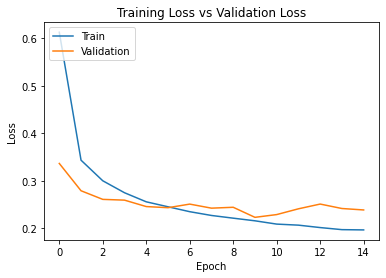

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    
    return (cnts, boundingBoxes)

In [32]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image      

In [33]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 17ms/step
BZNES


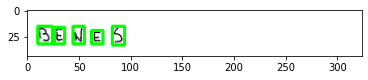

In [35]:
letter,image = get_letters("/content/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 15ms/step
LIL0U


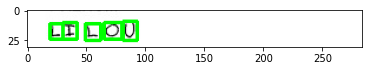

In [36]:
letter,image = get_letters("/content/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 14ms/step
SAYAN


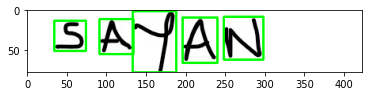

In [37]:
letter,image = get_letters("/content/t2.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 129ms/step
CALP0F


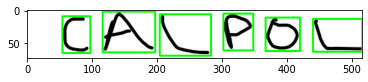

In [41]:
letter,image = get_letters("/content/t5.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)